In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

In [111]:
df = pd.read_csv('careermitra_dataset.csv')

In [112]:
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [139]:
features = [
    'Acedamic percentage in Operating Systems',
    'percentage in Algorithms',
    'Percentage in Programming Concepts',
    'Percentage in Software Engineering',
    'Percentage in Computer Networks',
    'Percentage in Electronics Subjects',
    'Percentage in Computer Architecture',
    'Percentage in Mathematics',
    'Percentage in Communication skills'
]

In [140]:
X = df[features]
y = df['Suggested Job Role']


In [141]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(np.unique(y_encoded))

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [147]:
class_weights = dict(enumerate(class_weights_array))

In [158]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [159]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [166]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1149 - loss: 3.2033 - val_accuracy: 0.0284 - val_loss: 3.7383
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1131 - loss: 3.2090 - val_accuracy: 0.0284 - val_loss: 3.7381
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1076 - loss: 3.2050 - val_accuracy: 0.0281 - val_loss: 3.7382
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1126 - loss: 3.2127 - val_accuracy: 0.0269 - val_loss: 3.7395
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1172 - loss: 3.1873 - val_accuracy: 0.0272 - val_loss: 3.7405
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1154 - loss: 3.2106 - val_accuracy: 0.0278 - val_loss: 3.7419
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1163 - loss: 3.1995 - val_accuracy: 0.0256 - val_loss: 3.7426
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1122 - loss: 3.2016 - val_accuracy: 0.0259 - val_loss

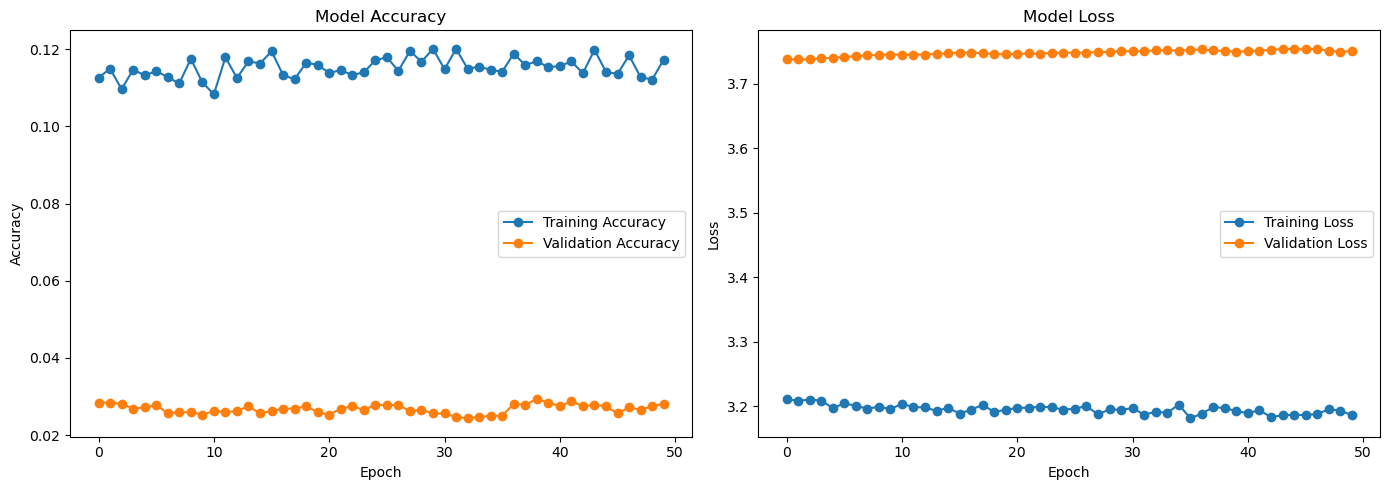

In [167]:
# Plot Accuracy & Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'o-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'o-', label='Training Loss')
plt.plot(history.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()